In [1]:
import keras
from keras.datasets import cifar10

import numpy as np

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import MaxPool2D, Flatten, Dense, Conv2D, Dropout

In [2]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

X_train.shape, y_train.shape

170498071/170498071 [==============================] - 50s 0us/step


((50000, 32, 32, 3), (50000, 1))

C:\Users\rushi\AppData\Roaming\Python\Python310\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


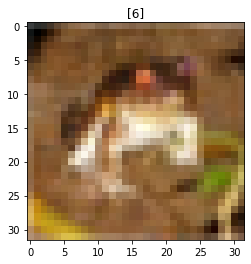

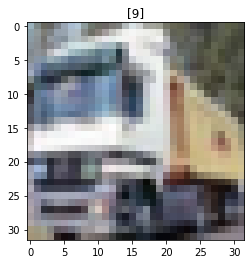

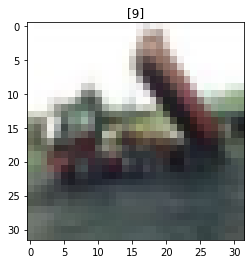

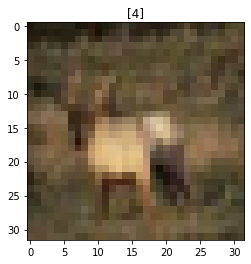

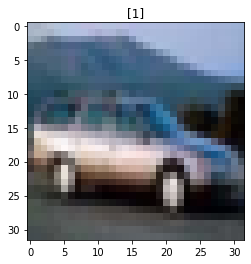

In [3]:
def plot_input_img(i):
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    plt.show()

for i in range(5):
    plot_input_img(i)


In [4]:
#PreProcessing the images

X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test, -1)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

X_train.shape, y_train.shape

((50000, 32, 32, 3, 1), (50000, 10))

In [5]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (32,32,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dropout (Dropout)           (None, 2304)              0

In [8]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [9]:
#Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)

mc = ModelCheckpoint("./bestmodel.h5", monitor='val_accuracy', verbose=1, save_best_only=True)

cb=[es,mc]

In [10]:
his = model.fit(X_train,y_train,epochs=50,validation_split=0.3,callbacks=cb)

Epoch 1/50
1094/1094 [==============================] - ETA: 0s - loss: 1.5837 - accuracy: 0.4261
Epoch 1: val_accuracy improved from -inf to 0.53333, saving model to .\bestmodel.h5
1094/1094 [==============================] - 21s 9ms/step - loss: 1.5837 - accuracy: 0.4261 - val_loss: 1.3477 - val_accuracy: 0.5333
Epoch 2/50
1089/1094 [============================>.] - ETA: 0s - loss: 1.2631 - accuracy: 0.5564
Epoch 2: val_accuracy improved from 0.53333 to 0.59387, saving model to .\bestmodel.h5
1094/1094 [==============================] - 8s 7ms/step - loss: 1.2628 - accuracy: 0.5565 - val_loss: 1.1731 - val_accuracy: 0.5939
Epoch 3/50
1093/1094 [============================>.] - ETA: 0s - loss: 1.1333 - accuracy: 0.6047
Epoch 3: val_accuracy improved from 0.59387 to 0.61680, saving model to .\bestmodel.h5
1094/1094 [==============================] - 7s 6ms/step - loss: 1.1336 - accuracy: 0.6045 - val_loss: 1.0993 - val_accuracy: 0.6168
Epoch 4/50
1085/1094 [==========================

In [12]:
model_S = keras.models.load_model("C://Users//rushi//Desktop//10 DL Projects//Cifar 10 Classification//bestmodel.h5")

In [13]:
score = model_S.evaluate(X_test,y_test)

print(f"the model accuracy is {score[1]} ")

score

313/313 [==============================] - 2s 5ms/step - loss: 0.9049 - accuracy: 0.6915
the model accuracy is 0.6915000081062317 


[0.9049267768859863, 0.6915000081062317]